<a href="https://colab.research.google.com/github/SamMilnes/Data-Science-Individual-Final-Project/blob/main/Data_Science_Individual_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras.utils.vis_utils import plot_model
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
golf_data = pd.read_csv('/content/gdrive/MyDrive/Data Science Individual Project/golf_data_forDSFinalProject.csv', encoding= 'unicode_escape')
golf_data.head()

,Unnamed: 0,year,player_name,ranking,top_10,wins,score_average,rounds,bounce_back,driving_accuracy,...,go_for_green,sand_save,prox_arg,putt_25,putt15_25,putt10_15,putt_10,finround_sa,masters_finish,total_score
0,1,2007,Aaron Baddeley,29,3,1,70.332,29.0,20.25,62.67,...,19.05,57.89,"6' 10""",7.95,16.90,26.87,87.25,69.67,T52,307
1,2,2008,Aaron Baddeley,43,1,0,70.837,27.0,26.56,58.53,...,20.00,43.59,"8' 11""",6.90,19.28,33.82,88.59,69.80,CUT,148
2,3,2009,Aaron Baddeley,120,0,0,71.129,20.0,15.63,44.36,...,18.18,49.09,"8' 2""",7.94,18.03,28.57,88.62,71.50,T17,284
3,4,2011,Aaron Baddeley,22,3,1,70.032,32.0,27.50,54.65,...,24.29,53.97,"6' 8""",5.04,20.41,30.99,88.43,70.29,T47,293
4,5,2012,Aaron Baddeley,T38,1,0,70.921,27.0,26.09,54.50,...,27.59,71.05,"7' 1""",3.00,14.49,39.06,89.00,69.67,T40,293


In [3]:
df = golf_data.copy()
df.drop(df.columns[0], axis=1, inplace=True)
df = df.dropna()
df.head()

,year,player_name,ranking,top_10,wins,score_average,rounds,bounce_back,driving_accuracy,driving_distance,...,go_for_green,sand_save,prox_arg,putt_25,putt15_25,putt10_15,putt_10,finround_sa,masters_finish,total_score
0,2007,Aaron Baddeley,29,3,1,70.332,29.0,20.25,62.67,283.2,...,19.05,57.89,"6' 10""",7.95,16.90,26.87,87.25,69.67,T52,307
1,2008,Aaron Baddeley,43,1,0,70.837,27.0,26.56,58.53,282.9,...,20.00,43.59,"8' 11""",6.90,19.28,33.82,88.59,69.80,CUT,148
2,2009,Aaron Baddeley,120,0,0,71.129,20.0,15.63,44.36,280.9,...,18.18,49.09,"8' 2""",7.94,18.03,28.57,88.62,71.50,T17,284
3,2011,Aaron Baddeley,22,3,1,70.032,32.0,27.50,54.65,294.9,...,24.29,53.97,"6' 8""",5.04,20.41,30.99,88.43,70.29,T47,293
4,2012,Aaron Baddeley,T38,1,0,70.921,27.0,26.09,54.50,289.0,...,27.59,71.05,"7' 1""",3.00,14.49,39.06,89.00,69.67,T40,293


In [4]:
def clean_prox_arg_column(row):
  new = row['prox_arg'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_arg_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_arg_final

def clean_prox_fair_column(row):
  new = row['prox_fair'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_fair_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_fair_final

def clean_prox_rough_column(row):
  new = row['prox_rough'].split()
  feet = new[0]
  inches_to_feet = feet[0]
  inches = new[1]
  inches_clean = inches.split('"')[0]
  prox_rough_final = int(inches_clean) + (int(inches_to_feet) * 12)

  return prox_rough_final

def clean_masters_finish_column(row):
  if "T" in row["masters_finish"]:
    return row['masters_finish'].replace("T", "")
  
def clean_masters_ranking_column(row):
  if "T" in row["ranking"]:
    return row['ranking'].replace("T", "")

In [5]:
df['prox_arg_clean'] = df.apply(clean_prox_arg_column, axis=1)
df['prox_fair_clean'] = df.apply(clean_prox_fair_column, axis=1)
df['prox_rough_clean'] = df.apply(clean_prox_rough_column, axis=1)

df['masters_finish_clean'] = df.apply(clean_masters_finish_column, axis=1)
df['ranking_clean'] = df.apply(clean_masters_ranking_column, axis=1)

df = df[df['masters_finish_clean'] != "CU"]
df = df[df['masters_finish_clean'] != "WD"]

df = df[df['ranking_clean'] != "CU"]
df = df[df['ranking_clean'] != "WD"]

df = df.dropna()

df = df.drop(columns=['prox_arg', 'prox_fair', 'prox_rough', 'masters_finish', 'ranking', 'hole_proximity', 'x_of_attempts'])

df['masters_finish_clean'] = df['masters_finish_clean'].astype('int')
df['ranking_clean'] = df['ranking_clean'].astype('int')

# This is the dataset we want to predict the total score for

In [6]:
df_2021 = df[df['year'] == 2021]
# df_2021

# This is the dataset we want to train our model on

In [7]:
df_train = df[df['year'] != 2021]
df_train = df_train.drop(columns=['year', 'player_name'])

# Exploratory Data Analysis

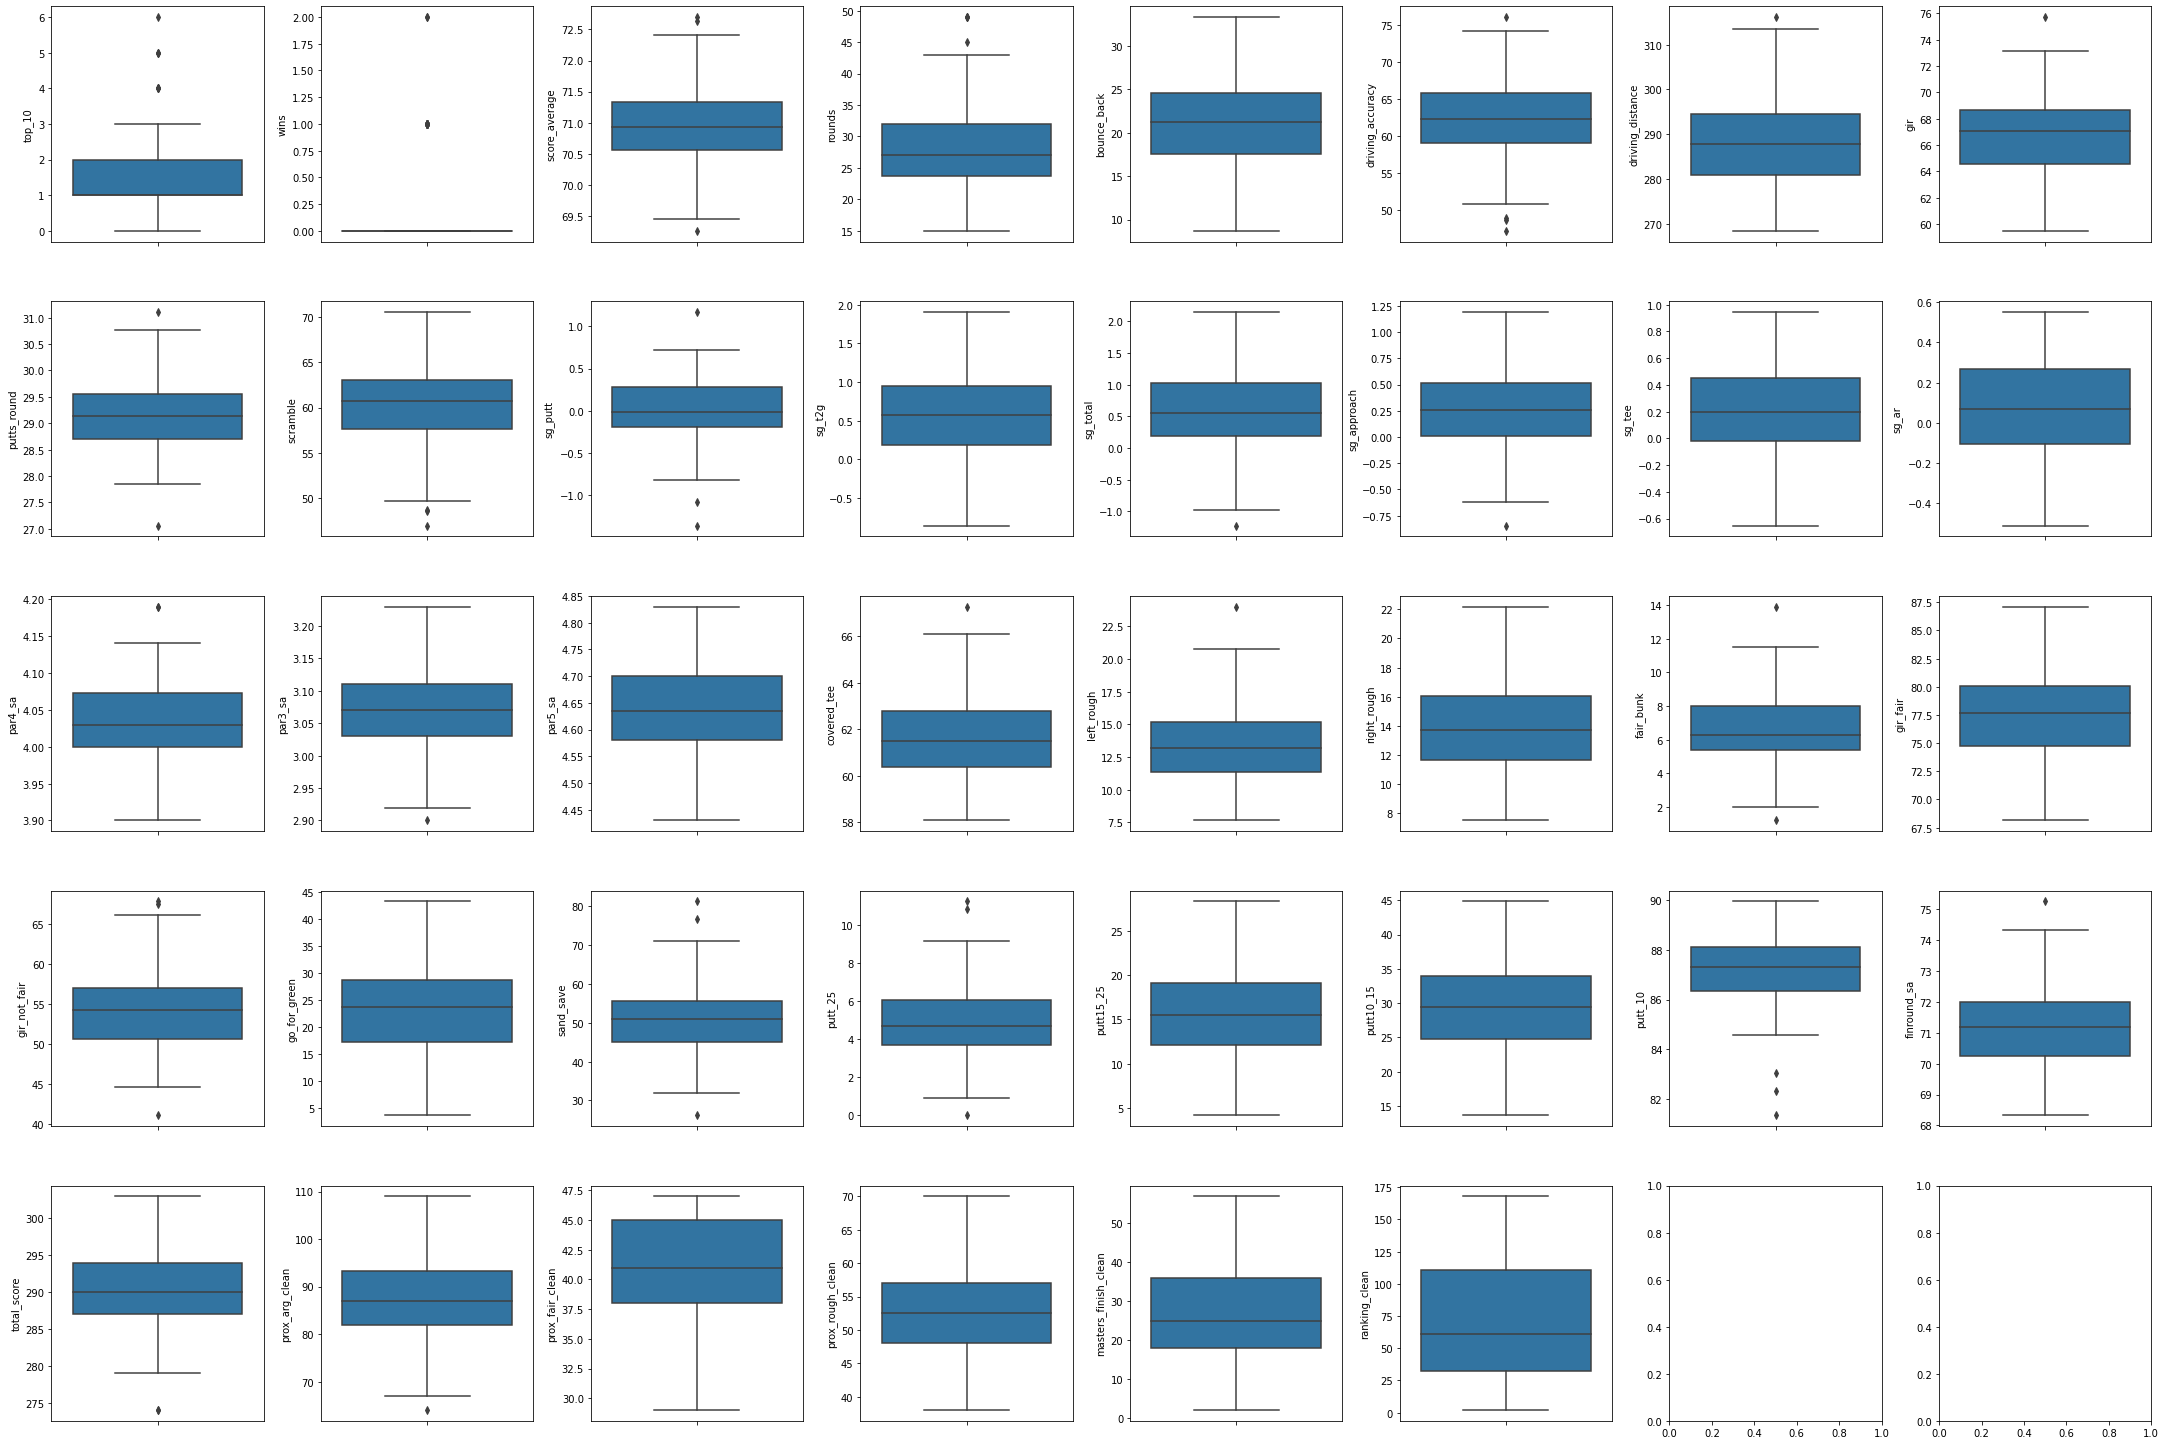

In [14]:
fig, axs = plt.subplots(ncols=8, nrows = 5, figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
  # print(k)
  sns.boxplot(y=k, data=df_train, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

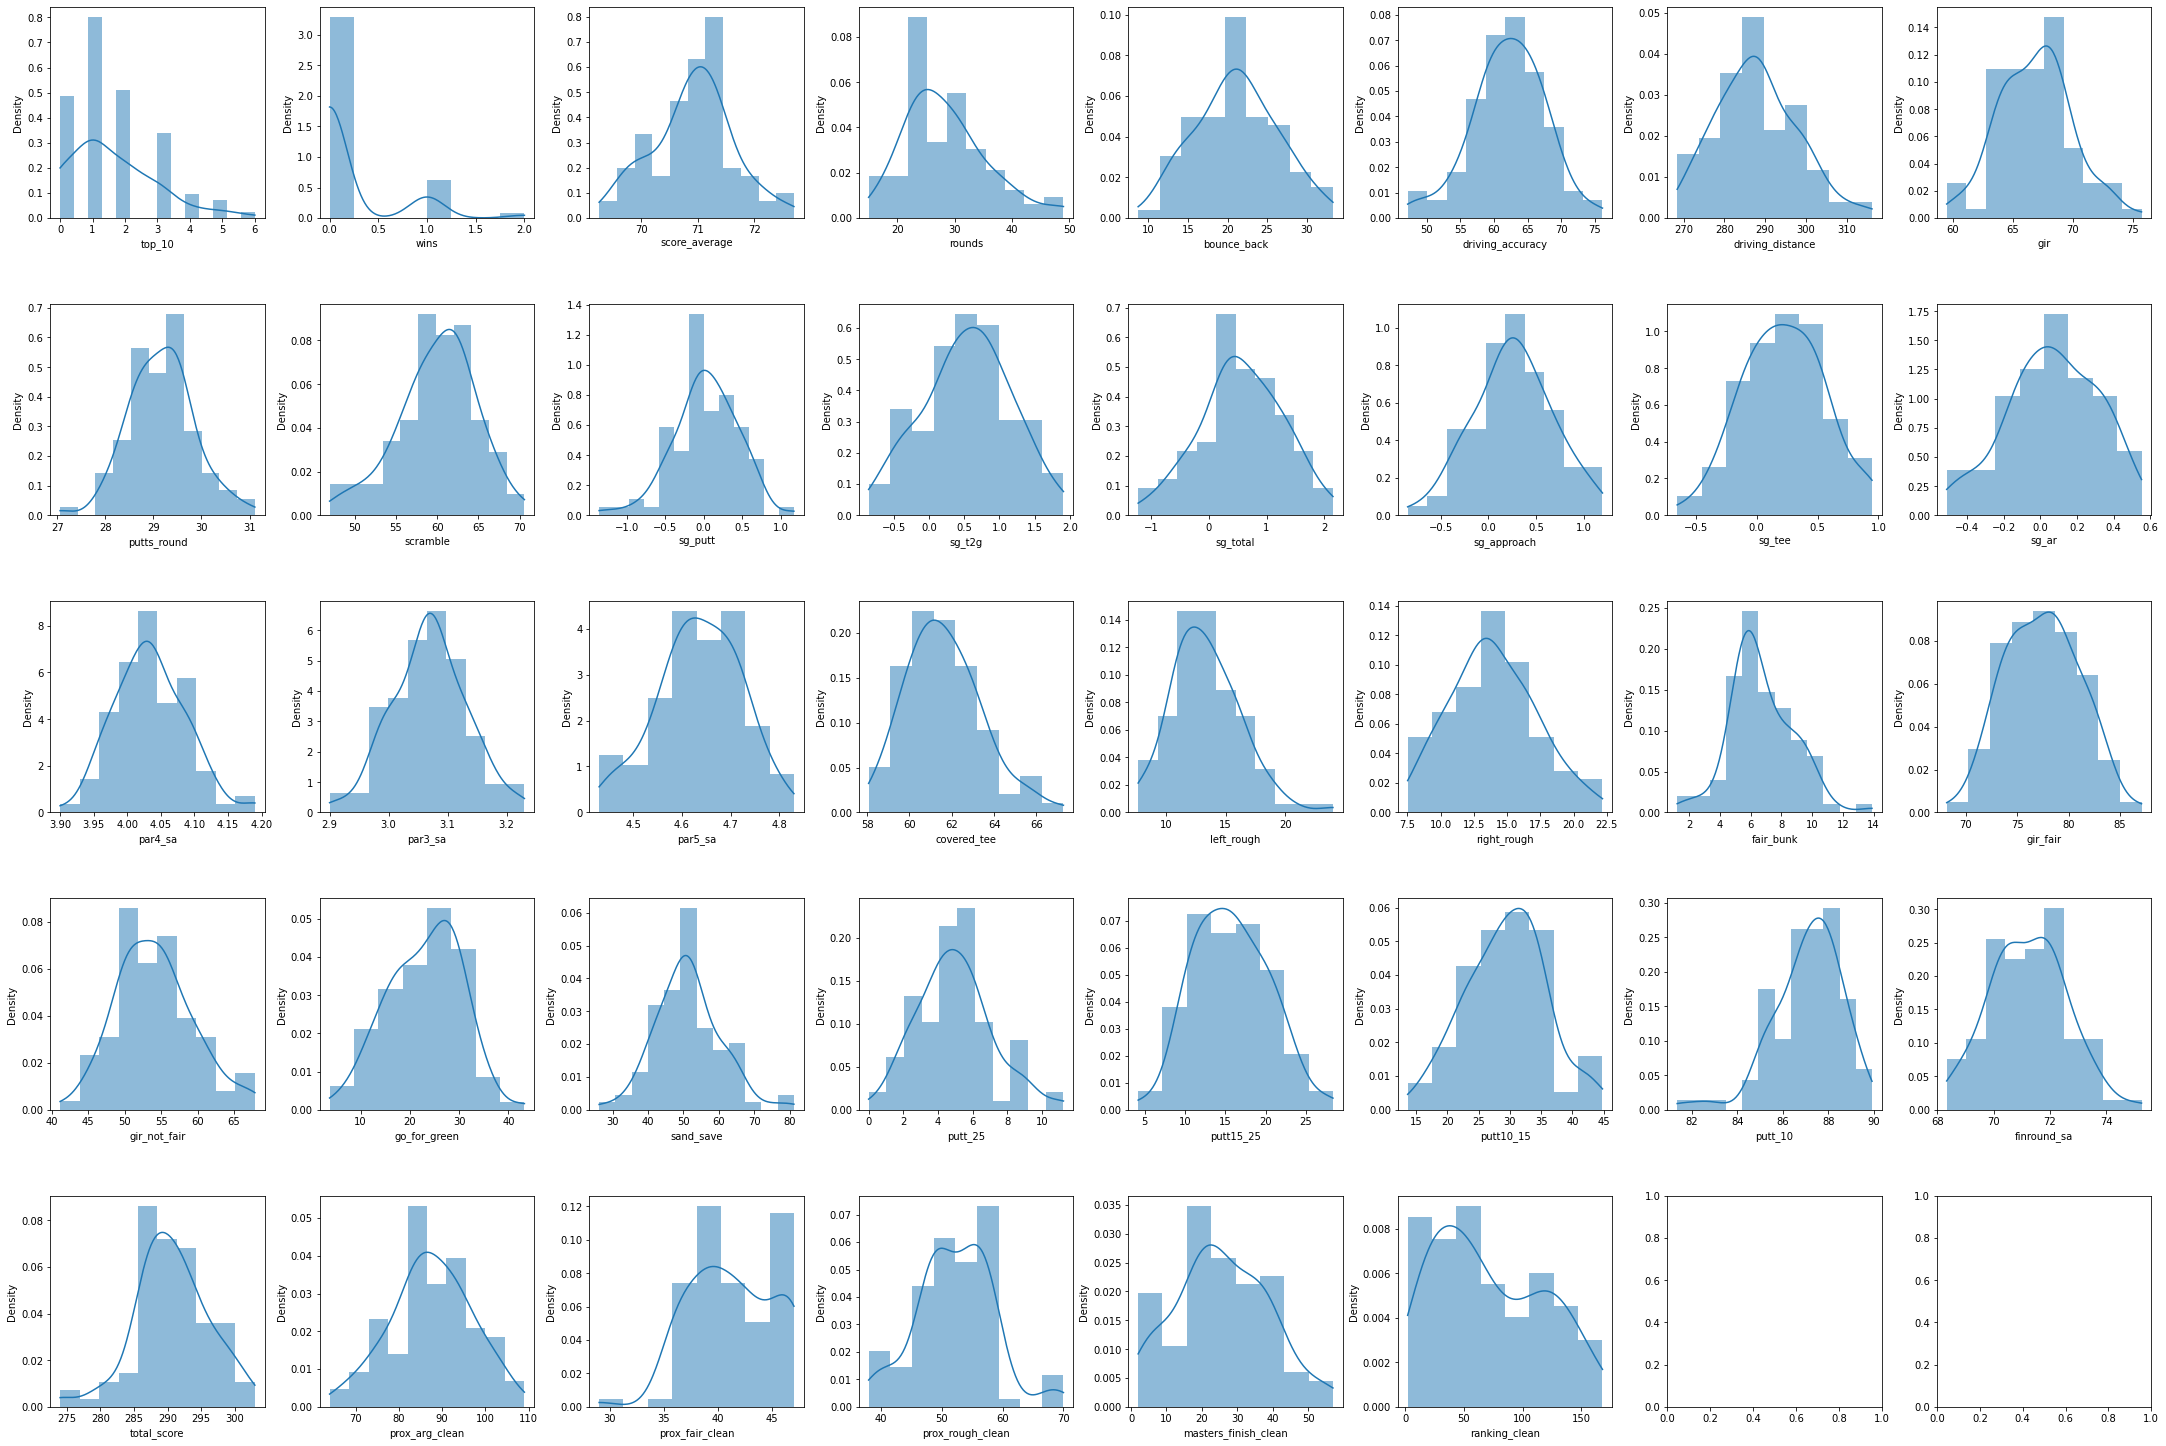

In [15]:
fig, axs = plt.subplots(ncols=8, nrows = 5, figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
  sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
for k,v in df_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5*iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_train)[0]
  print("%s Outliers = %.2f%%" % (k, perc))

top_10 Outliers = 8.33%
wins Outliers = 100.00%
score_average Outliers = 3.12%
rounds Outliers = 4.17%
bounce_back Outliers = 0.00%
driving_accuracy Outliers = 4.17%
driving_distance Outliers = 1.04%
gir Outliers = 1.04%
putts_round Outliers = 2.08%
scramble Outliers = 3.12%
sg_putt Outliers = 3.12%
sg_t2g Outliers = 0.00%
sg_total Outliers = 1.04%
sg_approach Outliers = 1.04%
sg_tee Outliers = 0.00%
sg_ar Outliers = 0.00%
par4_sa Outliers = 2.08%
par3_sa Outliers = 2.08%
par5_sa Outliers = 0.00%
covered_tee Outliers = 1.04%
left_rough Outliers = 1.04%
right_rough Outliers = 0.00%
fair_bunk Outliers = 2.08%
gir_fair Outliers = 0.00%
gir_not_fair Outliers = 3.12%
go_for_green Outliers = 0.00%
sand_save Outliers = 3.12%
putt_25 Outliers = 3.12%
putt15_25 Outliers = 0.00%
putt10_15 Outliers = 0.00%
putt_10 Outliers = 3.12%
finround_sa Outliers = 1.04%
total_score Outliers = 2.08%
prox_arg_clean Outliers = 1.04%
prox_fair_clean Outliers = 0.00%
prox_rough_clean Outliers = 0.00%
masters_fin